# Architecture of a Regression model 

|s.no| Hyperperamater | Binary classfication | Multiclass classification |
|----|----------------|----------------|---------|
|**1.**|**Input Layer Shape**|Same shape as number of features|Same as Binary Classification|
|**2.**|**Hidden Layer**|Problen Specific|Same as Binary Classification|
|**3.**|**Neurons per hidden layer**|Problen Specific,generally 1 to 10|Same as Binary Classification|
|**4.**|**Output Layer**|one class|1 per class ex 3 for 3 classes|
|**5.**|**Hidden Activation**|rectified Linear units relu|Same as Binary Classification|
|**6.**|**Output Activation**|sigmoid|softmax|
|**7.**|**Loss function**|Cross entropy (tf.keras.losses.BinaryCrossentropy)|Cross entropy (tf.keras.losses.categoricalCrossentropy)|
|**8.**|**Optimizers**|Stochastic Gradient Descent,Adam |Same as Binary Classification|

```python
# 1. Create the Model (Specified to your Problem)
model=tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)), # defining the input layer
    tf.keras.layers.Dense(100,activation="relu"),# Defining the hidden layers with the number of neurons and activation function
    tf.keras.layers.Dense(3,activation="softmax"), # defining the output layer with its own activation loyer
])


# 2. Compile the Model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # defining the lass function
             optimizer=tf.keas.optimizers.Adam(), #defining the optimizer
             metrics=["accuracy"])

# 3. Fit the Model
model.fit(X_train,Y_train,epochs=100) #training the model with epoches or loops

# 4. Evaluate the model
model.evaluate(xtest,ytest)
```

## Type of classification
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

# creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples=1000

# create circles
x, y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [3]:
# checkout the features
x,y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

## Visualize the data

In [4]:
import pandas as pd
data=pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})
data.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


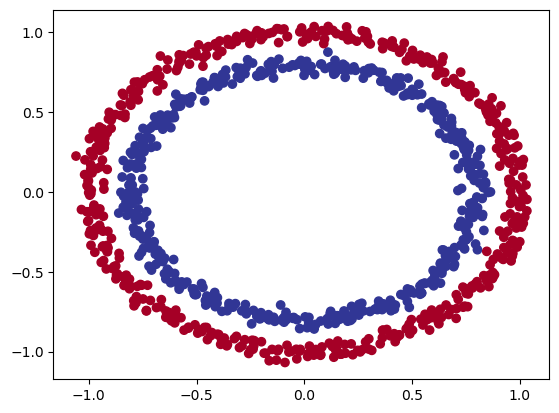

In [5]:
# plot
import matplotlib.pyplot as plt
plt.scatter(data["x0"],data["x1"],c=y, cmap=plt.cm.RdYlBu)

# Steps of modeling 
1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. tweak
6. Eval....

In [6]:
import tensorflow as tf

# set the random seed
tf.random.set_seed(42)

# create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"]
             )

# fit the model
model.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4820 - loss: 6.4393
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4560 - loss: 5.6894
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4550 - loss: 5.3020
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4570 - loss: 5.2467
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4700 - loss: 4.7390


## improve our model

In [6]:
# set the random seed
tf.random.set_seed(42)

# create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"]
             )

# fit the model
h=model.fit(x,y,epochs=200,verbose=0)
model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4730 - loss: 0.6933  


[0.6932879686355591, 0.4729999899864197]

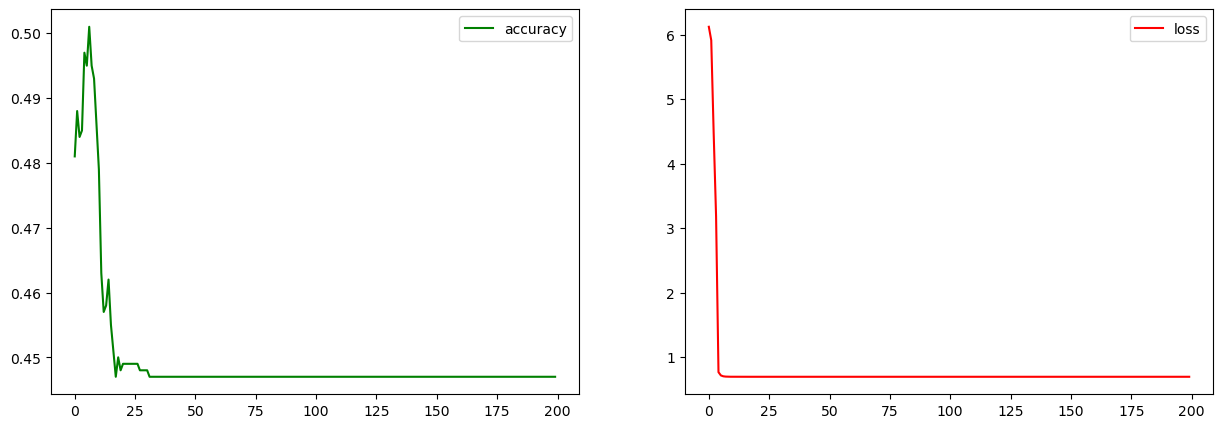

In [7]:
import matplotlib.pyplot as plt
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.plot(h.history["accuracy"],label="accuracy",c="g")
ax1.legend()
ax2.plot(h.history["loss"],label="loss",c="r")
ax2.legend()

In [8]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"]
             )

# fit the model
h2=model_2.fit(x,y,epochs=100,verbose=0)
model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4730 - loss: 0.6933 


[0.6932879686355591, 0.4729999899864197]

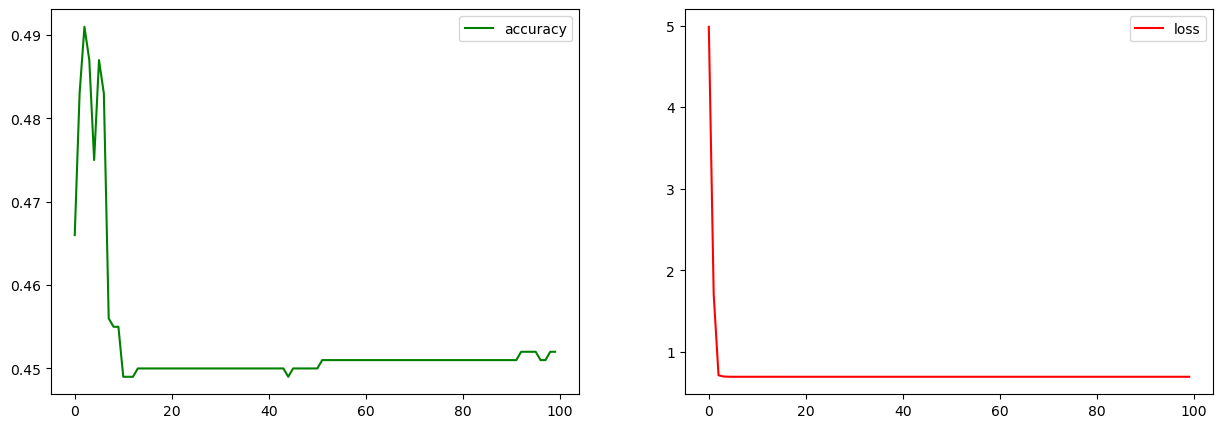

In [9]:
import matplotlib.pyplot as plt
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.plot(h2.history["accuracy"],label="accuracy",c="g")
ax1.legend()
ax2.plot(h2.history["loss"],label="loss",c="r")
ax2.legend()

In [10]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )

# fit the model
h3=model_3.fit(x,y,epochs=100,verbose=0)
model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4730 - loss: 0.6933 


[0.6932879686355591, 0.4729999899864197]

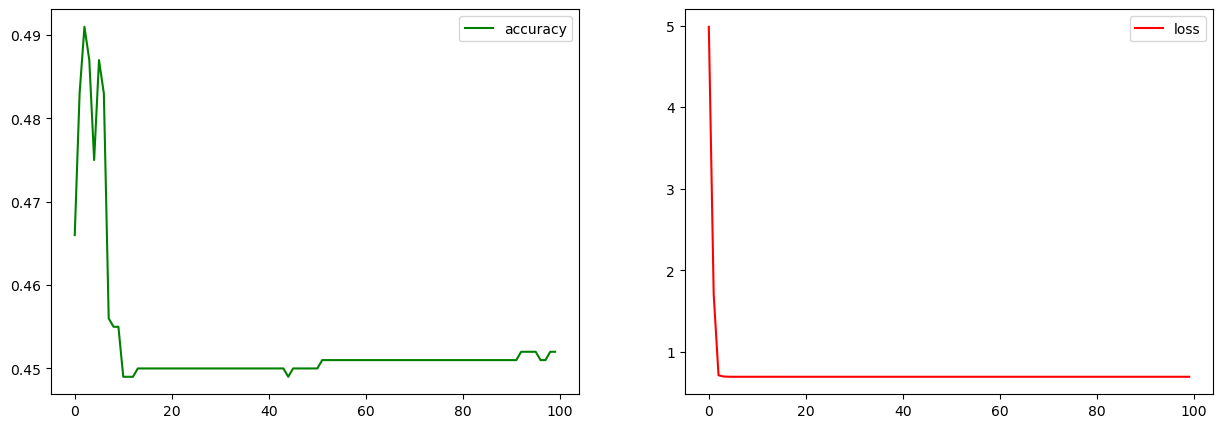

In [11]:
import matplotlib.pyplot as plt
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.plot(h2.history["accuracy"],label="accuracy",c="g")
ax1.legend()
ax2.plot(h2.history["loss"],label="loss",c="r")
ax2.legend()

In [12]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )

# fit the model
h3=model_3.fit(x,y,epochs=100,verbose=1)
model.evaluate(x,y)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4850 - loss: 1.3185
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4340 - loss: 0.8428 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4250 - loss: 0.7910 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4040 - loss: 0.7667 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3850 - loss: 0.7550 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3600 - loss: 0.7472
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3320 - loss: 0.7392 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3440 - loss: 0.7320 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3450 - loss: 0.7243 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3480 - loss: 0.7151 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3710 - loss: 0.7051 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

[0.6932879686355591, 0.4729999899864197]

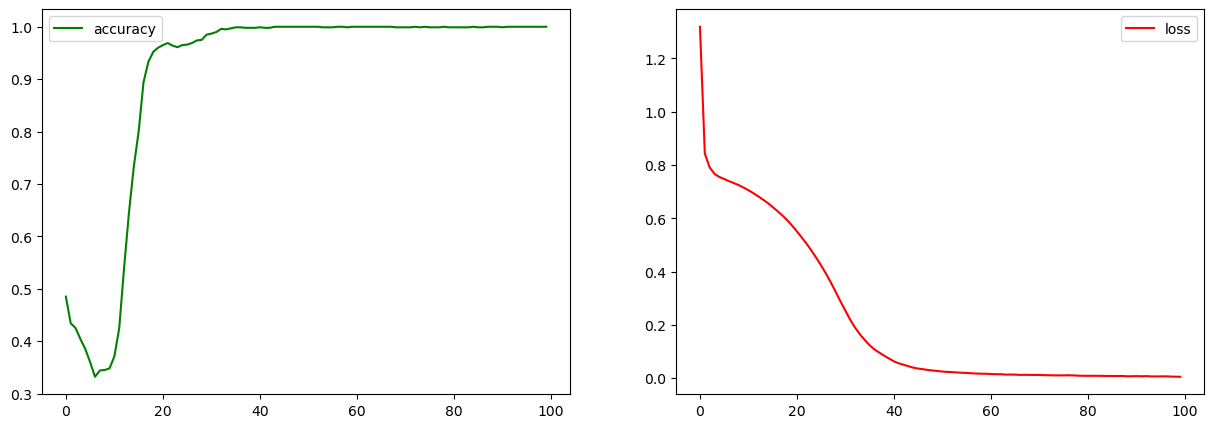

In [13]:
import matplotlib.pyplot as plt
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.plot(h3.history["accuracy"],label="accuracy",c="g")
ax1.legend()
ax2.plot(h3.history["loss"],label="loss",c="r")
ax2.legend()

In [14]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )

# fit the model
h4=model_4.fit(x,y,epochs=35,verbose=1)
model.evaluate(x,y)

Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4900 - loss: 2.8554
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3280 - loss: 0.7698 
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2380 - loss: 0.7555
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2340 - loss: 0.7486
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2420 - loss: 0.7420 
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2820 - loss: 0.7352 
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3220 - loss: 0.7279
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3600 - loss: 0.7194 
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4090 - loss: 0.7097 
Epoch 10/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4470 - loss: 0.6981 
Epoch 11/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5120 - loss: 0.6846
Epoch 12/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.615

[0.6932879686355591, 0.4729999899864197]

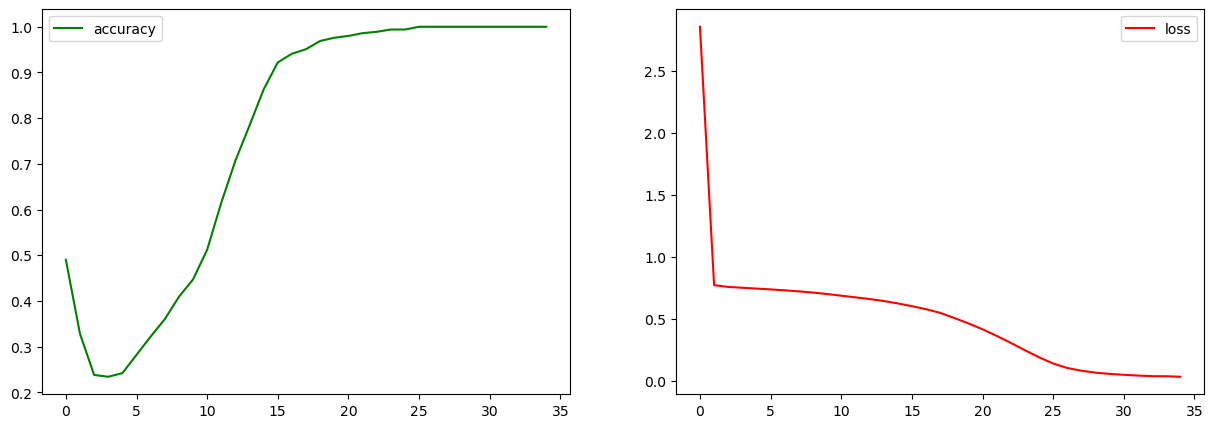

In [15]:
import matplotlib.pyplot as plt
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.plot(h4.history["accuracy"],label="accuracy",c="g")
ax1.legend()
ax2.plot(h4.history["loss"],label="loss",c="r")
ax2.legend()

In [16]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="leaky_relu"),
    tf.keras.layers.Dense(10,activation="leaky_relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )

# fit the model
h5=model_5.fit(x,y,epochs=50,verbose=1)
model.evaluate(x,y)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4130 - loss: 2.2055
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 0.7868 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: 0.7492 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3260 - loss: 0.7361 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3380 - loss: 0.7275 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3670 - loss: 0.7175 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4030 - loss: 0.7076
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4350 - loss: 0.6983 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4750 - loss: 0.6882 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5780 - loss: 0.6770 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - loss: 0.6635 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

[0.6932879686355591, 0.4729999899864197]

## desection boundry function

In [17]:
def decision_boundry(model,x,y,h={}):

    # defining the x axis and y axis points
    xmin = x[:, 0].min()-0.1
    xmax = x[:, 0].max()+0.1
    ymin = x[:, 1].min()-0.1
    ymax = x[:, 1].max()+0.1

    # making every points of our canvas grid
    xx,yy=np.meshgrid(np.linspace(xmin,xmax,100),
                     np.linspace(ymin,ymax,100))

    # create x values
    x_in = np.c_[xx.ravel(),yy.ravel()]

    # make prediction
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        y_pred=np.round(y_pred).reshape(xx.shape)

    # plot the decision boundry
    if len(h.history)>1:
        fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
        ax1.plot(h.history["accuracy"],label="accuracy",c="g")
        ax1.legend()
        ax2.plot(h.history["loss"],label="loss",c="r")
        ax2.legend()
        
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    ax1.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    ax1.scatter(x[:,0],x[:,-1],c=y,s=40,cmap=plt.cm.RdYlBu)
    
    ax2.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu)
    ax2.scatter(x[:,0],x[:,-1],c=y,s=40,cmap=plt.cm.RdYlBu)
    ax2.set_xlim(xx.min(),xx.max())
    ax2.set_ylim(yy.min(),yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step


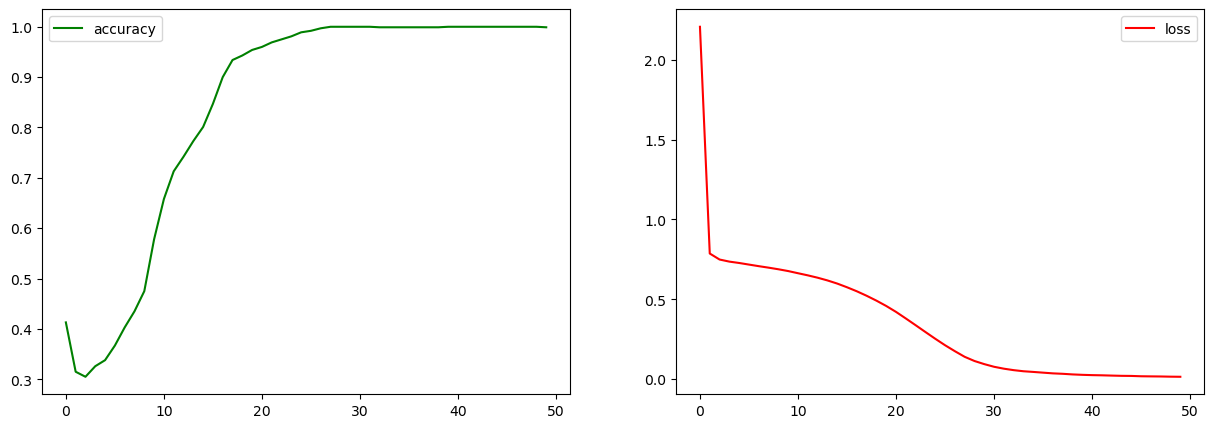

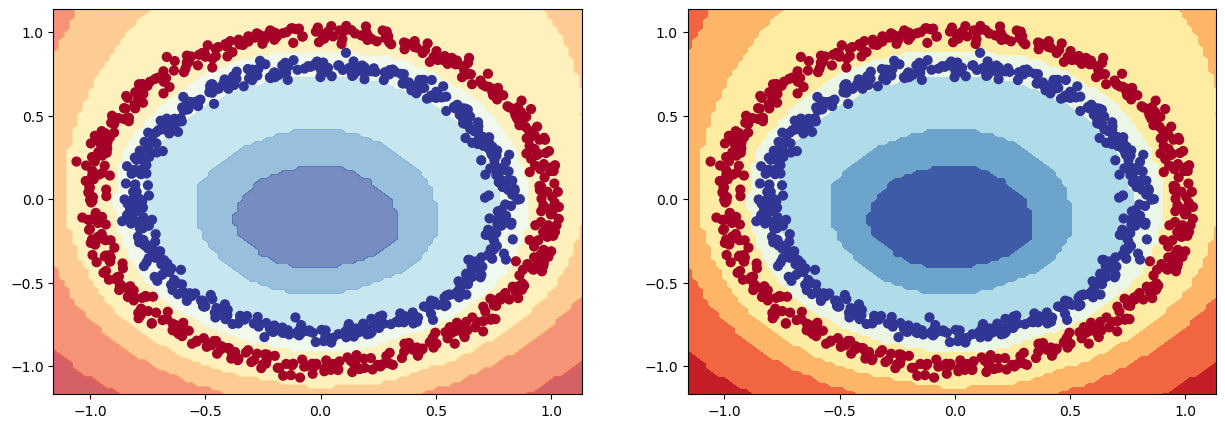

In [18]:
import numpy as np
decision_boundry(model =model_5,x=x,y=y,h=h5)

In [19]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )

# fit the model
h6=model_6.fit(x,y,epochs=50,verbose=1)
model_6.evaluate(x,y)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5020 - loss: 0.6997
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.6979 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5060 - loss: 0.6965 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5070 - loss: 0.6953 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5070 - loss: 0.6944
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.6936 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.6929 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.6921 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5010 - loss: 0.6914 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.6907 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5060 - loss: 0.6901 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

[0.5882236957550049, 0.8460000157356262]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step


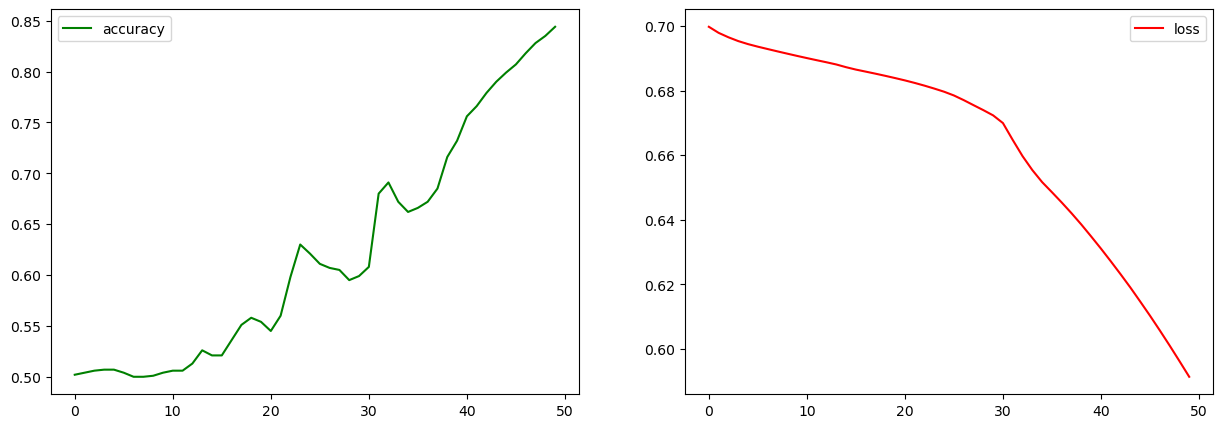

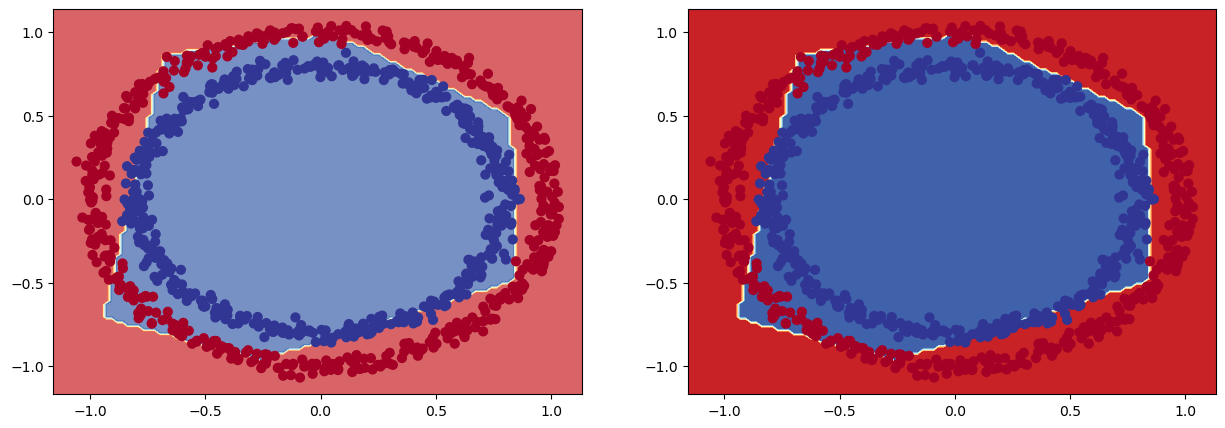

In [20]:
decision_boundry(model =model_6,x=x,y=y,h=h6)

In [21]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(0.01),
             metrics=["accuracy"]
             )

# fit the model
h7=model_7.fit(x,y,epochs=50,verbose=1)
model_7.evaluate(x,y)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5000 - loss: 0.6941
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.6907
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 0.6885 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5260 - loss: 0.6848
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5420 - loss: 0.6781
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5680 - loss: 0.6678
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5970 - loss: 0.6560 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6160 - loss: 0.6416 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - loss: 0.6125 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.5666
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.5032
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9190 

[0.012268931604921818, 0.9980000257492065]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step


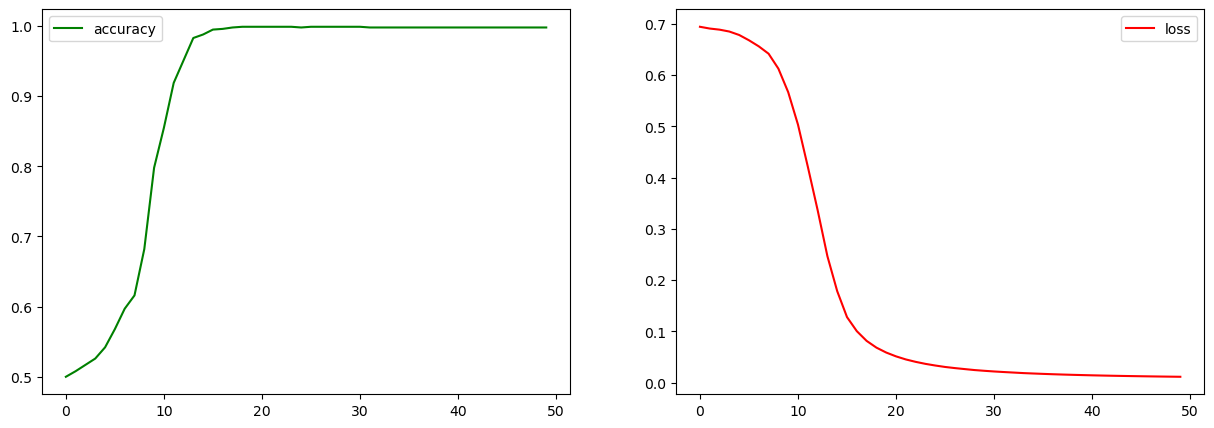

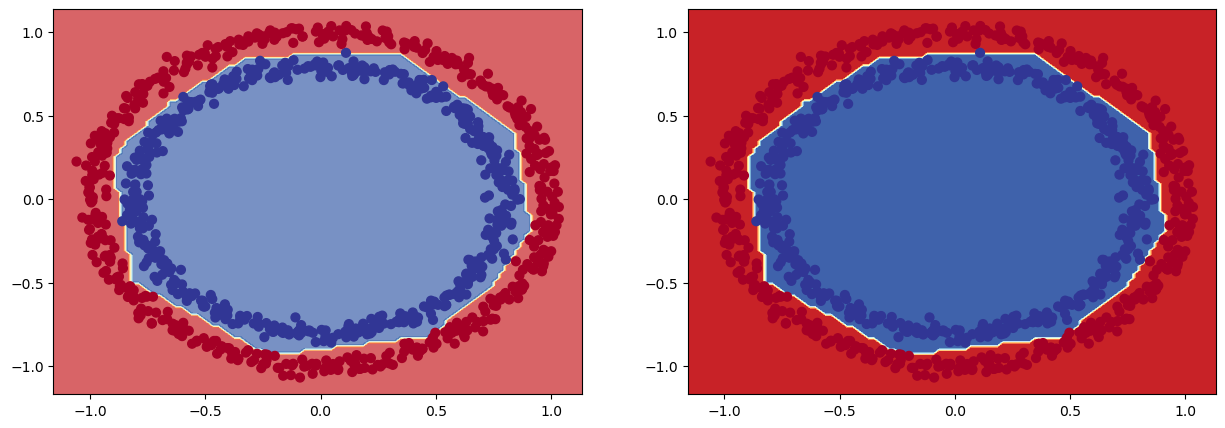

In [22]:
decision_boundry(model =model_7,x=x,y=y,h=h7)

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,shuffle=True)
for i in [xtrain,xtest,ytrain,ytest]:
    print(f"=",len(i))

= 800
= 200
= 800
= 200


In [24]:
len(x)

1000

## decision boundry for traning and testing

In [25]:
def decision_boundry_train_test(model,x,y,x_test,y_test):
    # defining the x axis and y axis points
    xmin = x[:, 0].min()-0.1
    xmax = x[:, 0].max()+0.1
    ymin = x[:, 1].min()-0.1
    ymax = x[:, 1].max()+0.1

    # making every points of our canvas grid
    xx,yy=np.meshgrid(np.linspace(xmin,xmax,100),
                     np.linspace(ymin,ymax,100))

    # create x values
    x_in = np.c_[xx.ravel(),yy.ravel()]

    # make prediction
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        y_pred=np.round(y_pred).reshape(xx.shape)

    # return to handle recursion
    if x_test.size==0:
        return y_pred,xx,yy

    # recursive function
    y_test_pred,xx_test,yy_test=decision_boundry_train_test(model,x_test,y_test,np.array([]),np.array([]))
    
    # figure
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    ax1.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.2)
    ax1.scatter(x[:,0],x[:,-1],c=y,s=40,cmap=plt.cm.RdYlBu)
    _,train_accuracy = model_8.evaluate(x,y)
    ax1.set_title(f"Traning accuracy=({train_accuracy})")
    ax1.set_xlim(xx.min(),xx.max())
    ax1.set_ylim(yy.min(),yy.max())
    
    ax2.contourf(xx_test,yy_test,y_test_pred,cmap=plt.cm.RdYlBu,alpha=0.2)
    ax2.scatter(x_test[:,0],x_test[:,-1],c=y_test,s=40,cmap=plt.cm.RdYlBu)
    _,test_accuracy = model_8.evaluate(x_test,y_test)
    ax2.set_title(f"Test accuracy=({test_accuracy})")
    ax2.set_xlim(xx_test.min(),xx_test.max())
    ax2.set_ylim(yy_test.min(),yy_test.max())

In [26]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(0.01),
             metrics=["accuracy"]
             )

# fit the model
h8=model_8.fit(xtrain,ytrain,epochs=50,verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4913 - loss: 0.7005
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 0.6960 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4712 - loss: 0.6945 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4950 - loss: 0.6936 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5400 - loss: 0.6930 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5462 - loss: 0.6926 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5288 - loss: 0.6922 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 0.6917 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5350 - loss: 0.6912 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5288 - loss: 0.6904 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5337 - loss: 0.6896 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [27]:
_,accuracy = model_8.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0365  


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0278 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0365 


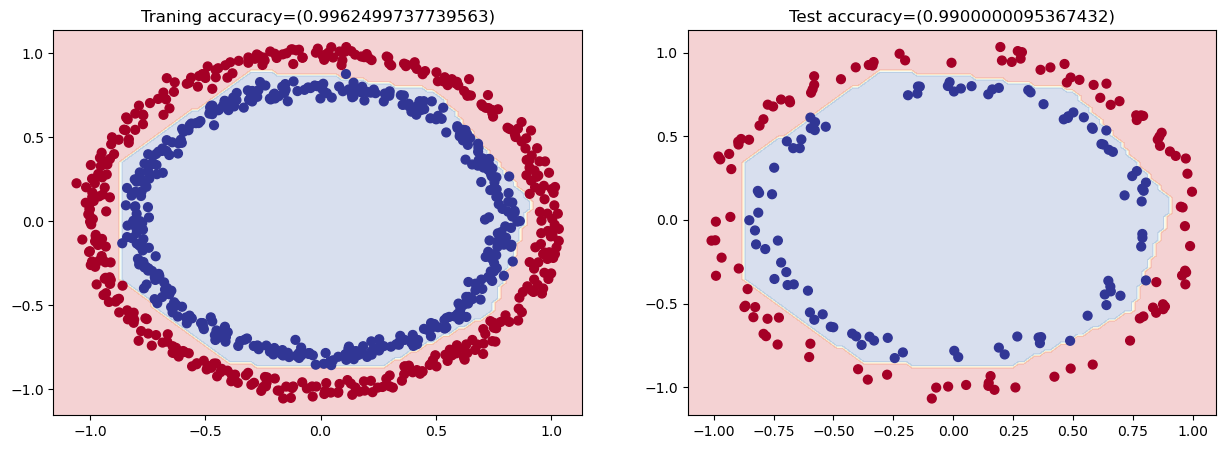

In [28]:
decision_boundry_train_test(model_8,
                            xtrain,
                            ytrain,
                            xtest,
                            ytest)

# finding the Ideal learning rate

* **learning rate callback**
* **modifiel loss curve**

In [29]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(0.01),
             metrics=["accuracy"]
             )
# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# fit the model
h9=model_9.fit(xtrain,ytrain,
               epochs=80,
               callbacks=[lr_scheduler],
               verbose=1)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5100 - loss: 0.7142 - learning_rate: 1.0000e-04
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 0.7136 - learning_rate: 1.1220e-04
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 0.7129 - learning_rate: 1.2589e-04
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 0.7123 - learning_rate: 1.4125e-04
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 0.7115 - learning_rate: 1.5849e-04
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.7108 - learning_rate: 1.7783e-04
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4913 - loss: 0.7099 - learning_rate: 1.9953e-04
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4900 - loss: 0.7091 - learning_rate: 2.2387e-04
Epoch 9/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4787 - loss: 0.7083 - learning_rate: 2.5

<Axes: xlabel='epochs'>

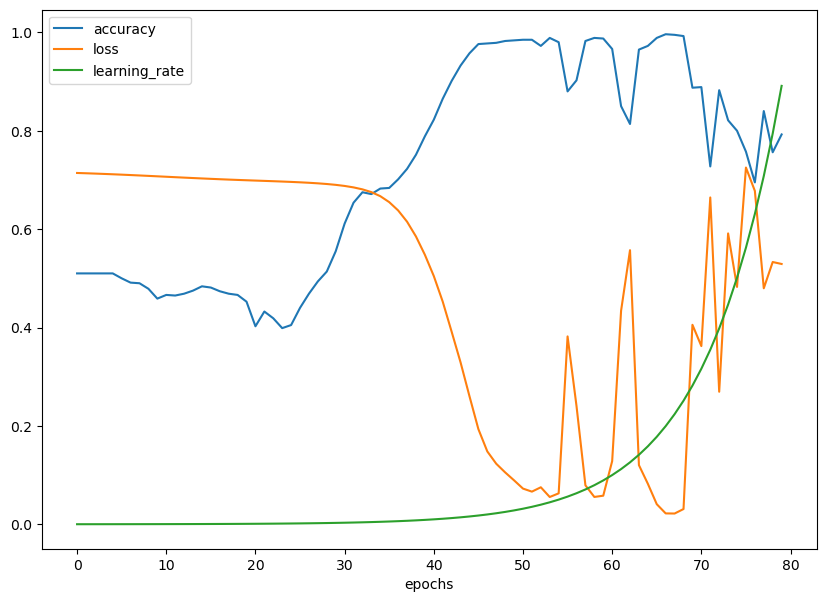

In [30]:
# checking our history
pd.DataFrame(h9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate VS Loss')

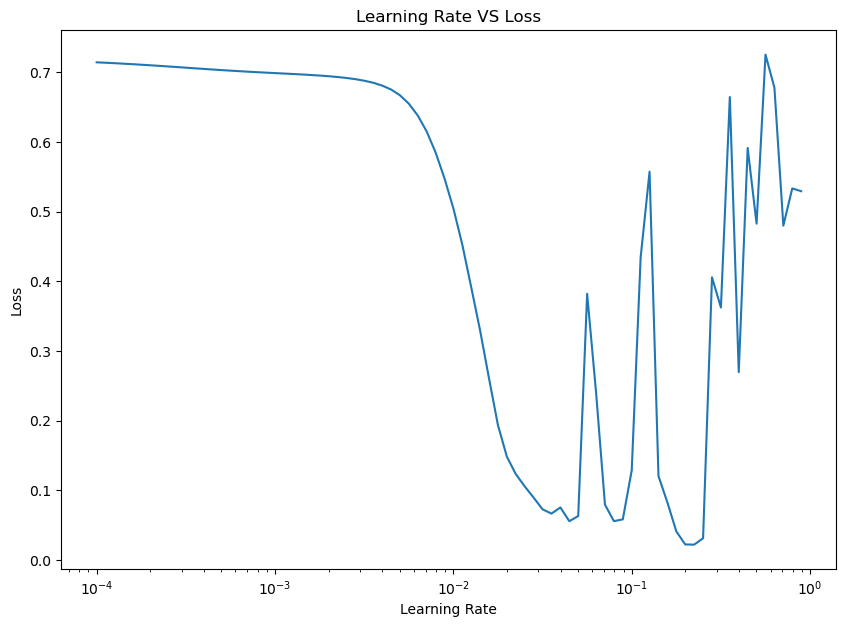

In [31]:
lrs = 1e-4 * (10**(tf.range(80)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,h9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss")

# Classification evaluation methods

|Metric Name | Metric Formuls | Code | when to use |
|------------|----------------|------|-------------|
|Accuracy|**Accuracy**=$\frac{tp+tn}{tp+tn+fp+fn}$|```python tf.keras.metrics.Accuracy() ```<br>```python sklearn.metrics.accuracy_score()```|Default matrics for clasifiaction problems.<br> Not the best for imbalance data|
|Precision|**Precision**=$\frac{tp}{tp+fp}$|```python tf.keras.metrics.Precision() ```<br>```python sklearn.metrics.precision_score()```|High Precision leads to less false positives.
|Recall|**Recall**=$\frac{tp}{tp+fn}$|```python tf.keras.metrics.Recall() ```<br>```python sklearn.metrics.recall_score()```|Higher recall leads to less false negatives.|
|F1-Score|**F1-Score**=$2\frac{Precision.Recall}{Precision+Recall}$|```python sklearn.metrics.f1_score()```|Combination of recall and precision, usally a good classification models.|
|Confusion matrix|**NA**|Custom function <br> ```python  sklearn.metrics.confusion_matrix()```| When comparing prediction of 2 labels to see where the model gets confused. can be hard to use with large number of calsses

* **Classifiction report**

# Working with a larger example (multiclass classification)

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data is already be sorted for us into training and testing dataset
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [8]:
print(f"Training samples: \n{train_data[0]}")
print(f"Training samples: \n{train_labels[0]}")

Training samples: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [11]:
import numpy as np
train_data[0].shape,np.unique(train_labels)

((28, 28), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

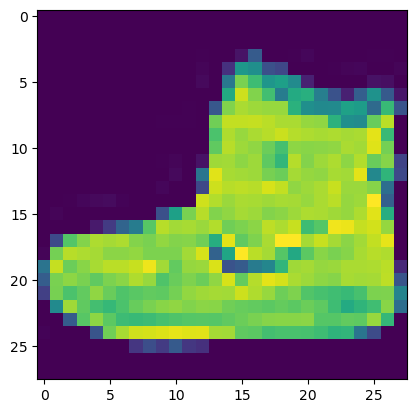

In [10]:
# ploting 
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [12]:
# create a small list for labels
CLASS_NAMES=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","sneaker","bag","Ankel boot"]

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [44]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_10=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# compile the model
model_10.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(0.01),
             metrics=["accuracy"]
             )

# fit the model
h10=model_10.fit(train_data,
                 tf.one_hot(train_labels,depth=10),
                 epochs=10,
                 validation_data=(test_data,tf.one_hot(test_labels,depth=10)),
                 verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7082 - loss: 1.5248 - val_accuracy: 0.7261 - val_loss: 0.7332
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7566 - loss: 0.7049 - val_accuracy: 0.7615 - val_loss: 0.6877
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7625 - loss: 0.6811 - val_accuracy: 0.7509 - val_loss: 0.7495
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7615 - loss: 0.6770 - val_accuracy: 0.6969 - val_loss: 0.8064
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7580 - loss: 0.6905 - val_accuracy: 0.7583 - val_loss: 0.7250
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7593 - loss: 0.6898 - val_accuracy: 0.6945 - val_loss: 0.8548
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7565 - loss: 0.6974 - val_accuracy: 0.7426 - val_loss: 0.7150
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7612 - loss: 0.6780 - 

**Note**: if you are getting size errors then see the input,output and lossfunction

In [45]:
model_10.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

## scaling the data

_the neural network model prefer to be scaled in the range of 0 to 1 means **(Normalized)** reather then standard scaling_

In [14]:
train_data_norm = train_data/255
test_data_norm = test_data/255 
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [53]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_10=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# compile the model
model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(0.01),
             metrics=["accuracy"]
             )

# fit the model
h10=model_10.fit(train_data_norm,
                 tf.one_hot(train_labels,depth=10),
                 epochs=10,
                 validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                 verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7250 - loss: 0.7536 - val_accuracy: 0.7882 - val_loss: 0.6164
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7934 - loss: 0.5881 - val_accuracy: 0.8001 - val_loss: 0.5781
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8065 - loss: 0.5553 - val_accuracy: 0.8082 - val_loss: 0.5585
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8165 - loss: 0.5307 - val_accuracy: 0.8121 - val_loss: 0.5486
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8196 - loss: 0.5216 - val_accuracy: 0.8099 - val_loss: 0.5601
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8217 - loss: 0.5171 - val_accuracy: 0.8146 - val_loss: 0.5547
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8231 - loss: 0.5119 - val_accuracy: 0.8146 - val_loss: 0.5496
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8249 - loss: 0.5073 - 

## finding the best learning rate

In [66]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_11=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )
# creating the learning rate epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# fit the model
h11=model_11.fit(train_data_norm,
                 train_labels,
                 epochs=50,
                 validation_data=(test_data_norm,test_labels),
                 callbacks=[lr_scheduler])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3311 - loss: 1.7646 - val_accuracy: 0.4473 - val_loss: 1.4710 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5429 - loss: 1.2534 - val_accuracy: 0.6163 - val_loss: 1.0881 - learning_rate: 1.1220e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6598 - loss: 0.9686 - val_accuracy: 0.6782 - val_loss: 0.8992 - learning_rate: 1.2589e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7038 - loss: 0.8384 - val_accuracy: 0.7156 - val_loss: 0.8145 - learning_rate: 1.4125e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7315 - loss: 0.7707 - val_accuracy: 0.7364 - val_loss: 0.7635 - learning_rate: 1.5849e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7500 - loss: 0.7247 - val_accuracy: 0.7507 - val_loss: 0.7269 - learning_rate: 1.7783e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

Text(0.5, 1.0, 'Learning Rate VS Loss')

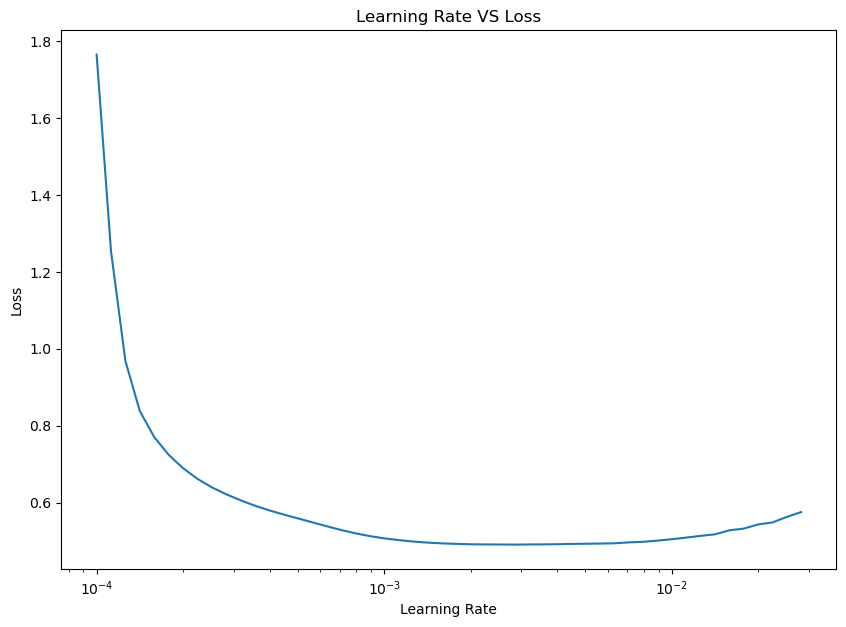

In [67]:
lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,h11.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss")

In [15]:
 # set the random seed
tf.random.set_seed(42)

# create a model
model_11=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(4,activation="leaky_relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(0.001),
             metrics=["accuracy"]
             )
# creating the learning rate epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# fit the model
h11=model_11.fit(train_data_norm,
                 train_labels,
                 epochs=20,
                 validation_data=(test_data_norm,test_labels),
                 callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4405 - loss: 1.7351 - val_accuracy: 0.5247 - val_loss: 1.4582 - learning_rate: 1.0000e-04
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5451 - loss: 1.2776 - val_accuracy: 0.5697 - val_loss: 1.1252 - learning_rate: 1.1220e-04
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6201 - loss: 0.9936 - val_accuracy: 0.6523 - val_loss: 0.8931 - learning_rate: 1.2589e-04
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6884 - loss: 0.8199 - val_accuracy: 0.7071 - val_loss: 0.7798 - learning_rate: 1.4125e-04
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7309 - loss: 0.7368 - val_accuracy: 0.7330 - val_loss: 0.7226 - learning_rate: 1.5849e-04
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7495 - loss: 0.6889 - val_accuracy: 0.7467 - val_loss: 0.6865 - learning_rate: 1.7783e-04
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/ste

Text(0.5, 1.0, 'Learning Rate VS Loss')

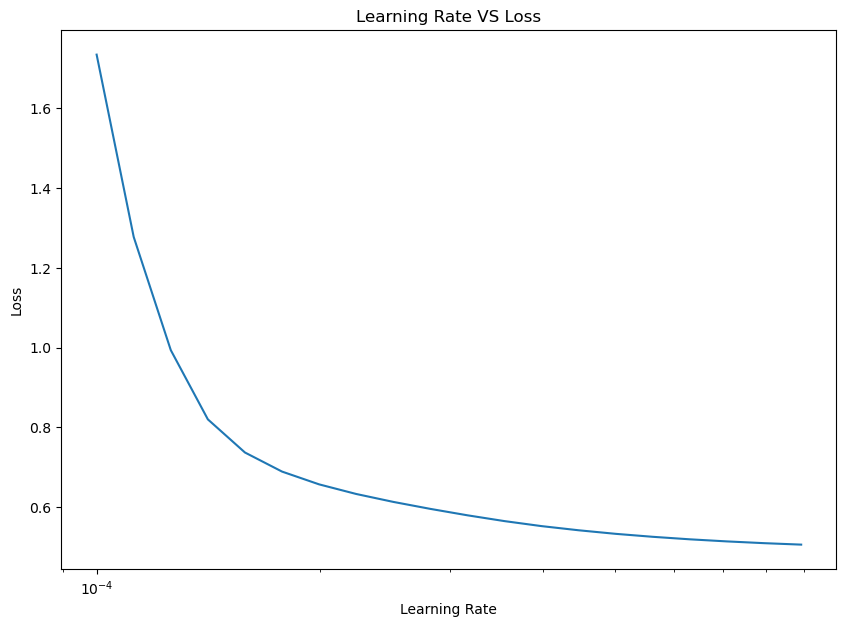

In [16]:
lrs = 1e-4 * (10**(tf.range(20)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,h11.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss")

# What pattern is our model traning?

## layers of the model

In [17]:
model_11.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [18]:
# extract a perticular layer
model_11.layers[1]

<Dense name=dense_1, built=True>

In [19]:
# get the pattern of the layers in our network
weights,biases = model_11.layers[1].get_weights()

# Shape
weights,weights.shape

(array([[-0.0508738 , -0.399274  ,  0.0130816 ,  0.33396602],
        [-0.3671731 , -0.1726876 , -0.18202826,  0.23303403],
        [-0.48167983, -0.23065643, -0.14360406,  0.16883041],
        ...,
        [-0.02305494,  0.19669889, -0.16888142,  0.5725576 ],
        [ 0.02723247, -0.06610414, -0.41802406,  0.5197808 ],
        [ 0.24752805, -0.20720534,  0.01395333,  0.29012087]],
       dtype=float32),
 (784, 4))

In [20]:
biases,biases.shape

(array([-0.1637464,  1.2712715,  0.4140684, -0.2599   ], dtype=float32), (4,))

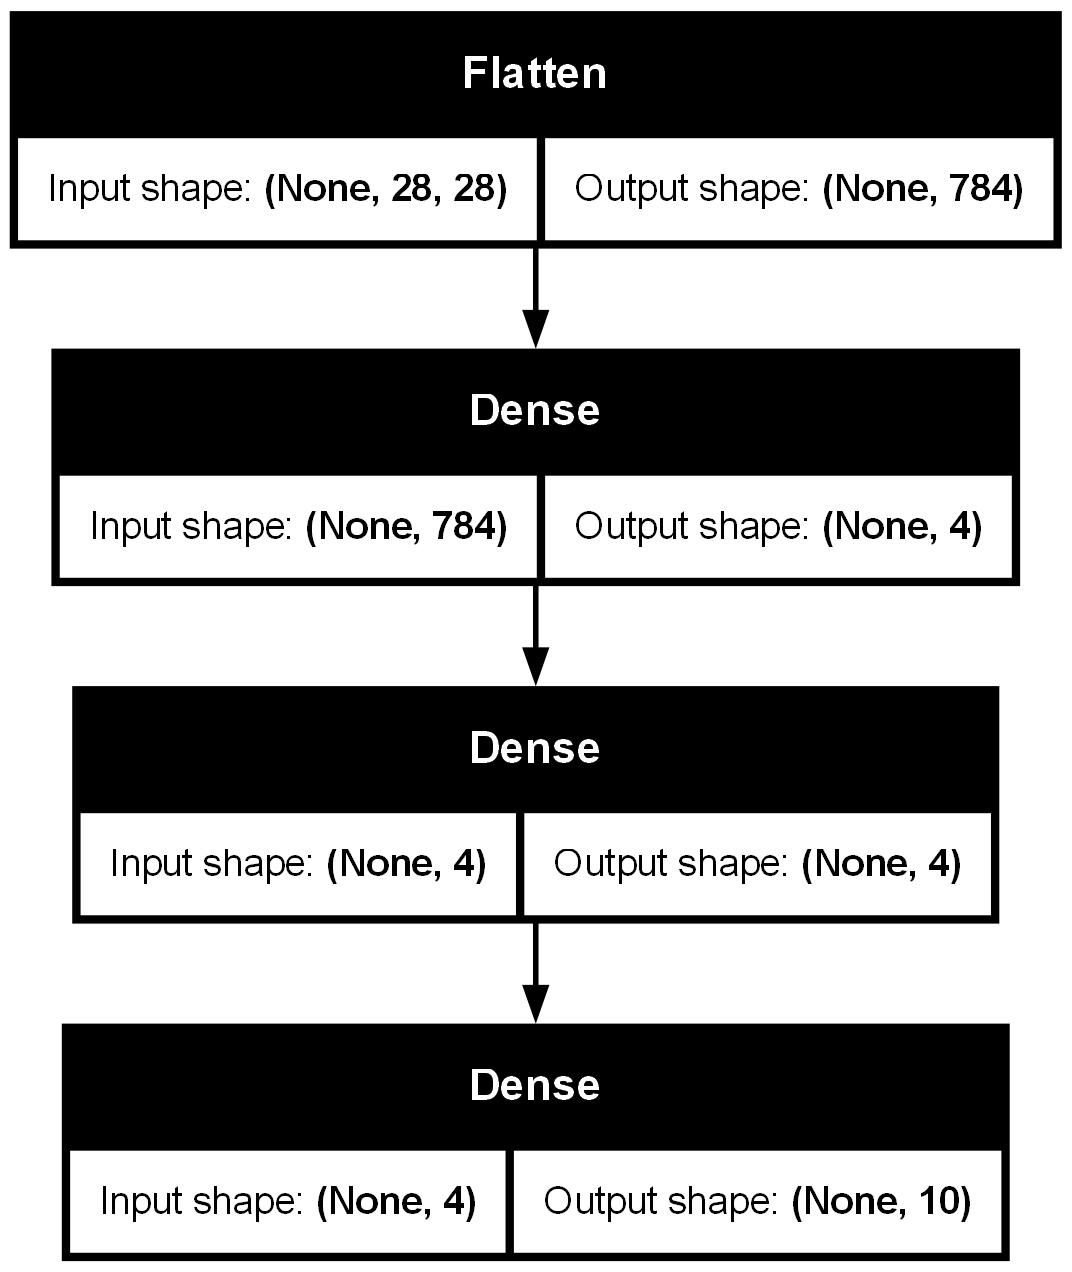

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model_11,show_shapes=True)